In [1]:
#import library 
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv') #import dataset

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(8555, 3)

In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
#using label encoder 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] =le.fit_transform(df['Gender'])

In [7]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [8]:
# separate dataset
x = df[['Gender','Height']] 
y = df[['Weight']]


In [9]:
# traing and test dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,test_size = .30, random_state = 1)

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [13]:
reg.predict([[73.847017,241.893563]])

C:\Users\Ariyan Khan Monir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2627.74614043]])

In [14]:
# predicting the test set result
y_pred = reg.predict(xtest)

In [15]:
y_pred

array([[143.83013436],
       [197.53417989],
       [184.63515112],
       ...,
       [160.7078525 ],
       [186.82852694],
       [201.4226542 ]])

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
mse = mean_squared_error(ytest, y_pred)

In [18]:
mse

99.67250998070034

In [19]:
mae = mean_absolute_error(ytest,y_pred)

In [20]:
mae

7.98213259272913

In [21]:
#accuracy
reg.score(xtest,ytest)

0.905995960709116

# KNN Regression

In [22]:
from sklearn.neighbors import KNeighborsRegressor
# Weight function used in prediction = uniform
kn = KNeighborsRegressor(n_neighbors = 5)
kn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [23]:
y_pred1 = kn.predict(xtest)
y_pred1

array([[150.1761117 ],
       [197.46276978],
       [179.03501546],
       ...,
       [160.26227546],
       [180.65461322],
       [200.56451578]])

In [24]:
#Weight function used in prediction = distance
kn_1 = KNeighborsRegressor(n_neighbors = 5, weights='distance')
kn_1.fit(xtrain,ytrain)

KNeighborsRegressor(weights='distance')

In [25]:
y_pred2 = kn_1.predict(xtest)

In [26]:
y_pred2

array([[152.37225448],
       [196.13462827],
       [179.18462633],
       ...,
       [158.00868638],
       [182.46459082],
       [202.88781132]])

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
mse = mean_squared_error(ytest, y_pred2)

In [29]:
mse

145.6044524990331

In [30]:
mae =mean_absolute_error(ytest,y_pred2)

In [31]:
mae

9.46967317025703

In [32]:
#accuracy
kn_1.score(xtest,ytest)

0.8626762115622747

# KNN classifier

In [33]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [34]:
df.shape 

(8555, 3)

# visualization

In [35]:
df0 = df[:2851]
df1 = df[2851:5702]
df2 = df[5702:8555]

Text(0, 0.5, 'Weight')

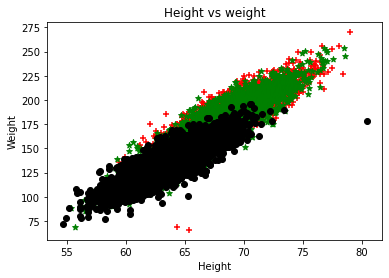

In [36]:
plt.scatter(df0['Height'],df0['Weight'],color = 'red',marker = '+')
plt.scatter(df1['Height'],df1['Weight'],color = 'green',marker = '*')
plt.scatter(df2['Height'],df2['Weight'],color = 'black',marker = 'o')

plt.title('Height vs weight')
plt.xlabel('Height')
plt.ylabel('Weight')

In [37]:
#separate dataset
x1 = df.drop('Gender',axis = 1)
y1 = df['Gender']

In [38]:
#test and train model
from sklearn.model_selection import train_test_split
x1train,x1test,y1train,y1test = train_test_split(x1,y1, test_size = .30, random_state = 1)


# Apply KNN Classifier Algorithm

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x1train,y1train)

KNeighborsClassifier()

In [40]:
# Male = 1 , Female = 0
knn.predict([[74.110105,212.740856]])

C:\Users\Ariyan Khan Monir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [41]:
#accuarcy
knn.score(x1test,y1test)

0.9146864043630697

# Plot Confusion Matrix

<AxesSubplot:>

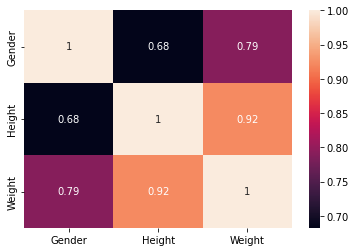

In [42]:
import seaborn as sns
sns.heatmap(df.corr(),annot = True)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,plot_roc_curve

In [44]:
pred_3 = knn.predict(x1test)

In [45]:
pred_3

array([1, 1, 1, ..., 0, 1, 1])

In [46]:
np.array (y1test)

array([0, 1, 1, ..., 0, 1, 1])

In [47]:
cm = confusion_matrix(y1test,pred_3)

In [48]:
cm

array([[ 938,  117],
       [ 102, 1410]], dtype=int64)

In [49]:
#model accuracy
accuracy_score(y1test,pred_3)

0.9146864043630697

In [50]:
print(classification_report(y1test,pred_3))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1055
           1       0.92      0.93      0.93      1512

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



C:\Users\Ariyan Khan Monir\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


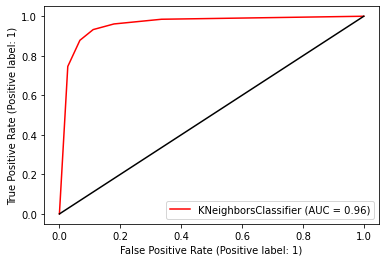

In [51]:
plot_roc_curve(knn,x1test,y1test,color='red')
plt.plot([0,1],[0,1],color = 'black')

# Thank you for watching